<a href="https://colab.research.google.com/github/saketlakhotia17/10daysofmlchallenge/blob/master/Day4(TFChallenge).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd


In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
downloaded = drive.CreateFile({'id':'1ZOw-X9kJU7ralC1qGvgY1isWFkxMzoBn'})
downloaded.GetContentFile('test.csv')

downloaded = drive.CreateFile({'id':'1lD8x32NMcefG10cZbq4gJZ-OG_HNRUCW'})
downloaded.GetContentFile('train.csv')


In [0]:
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

In [0]:
train["date_time"] = pd.to_datetime(train["date_time"])
props = {}
for prop in ["month", "day", "hour", "minute", "dayofweek", "quarter"]:
    props[prop] = getattr(train["date_time"].dt, prop)
train = train.join(pd.DataFrame(props))


test["date_time"] = pd.to_datetime(test["date_time"])
props = {}
for prop in ["month", "day", "hour", "minute", "dayofweek", "quarter"]:
    props[prop] = getattr(test["date_time"].dt, prop)
test = test.join(pd.DataFrame(props))

In [0]:
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

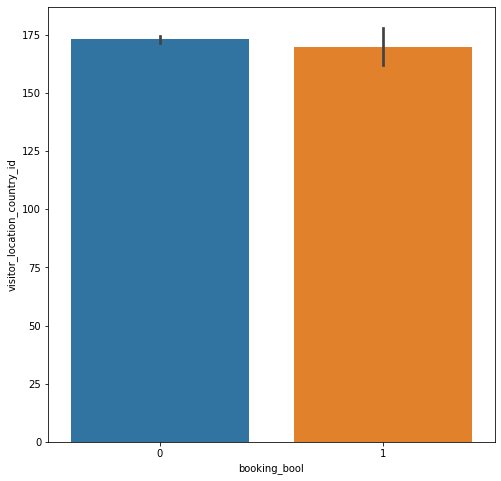

In [0]:
plt.figure(figsize=(8,8))
sns.barplot(x='booking_bool',y='visitor_location_country_id',data=train[:10000])

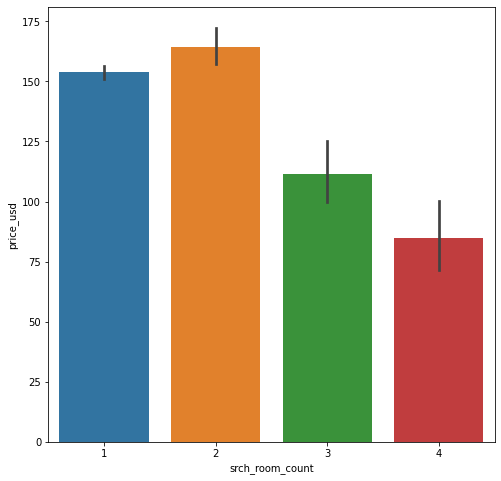

In [0]:
plt.figure(figsize=(8,8))
sns.barplot(y='price_usd',x='srch_room_count',data=train[:10000])


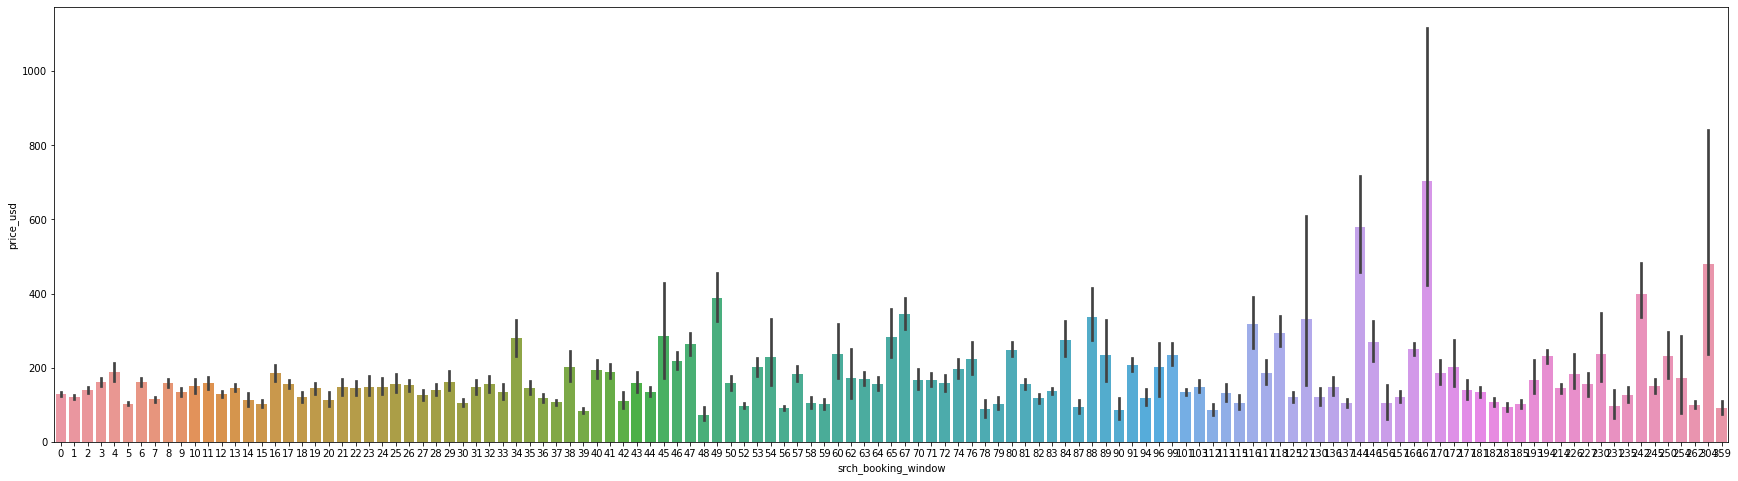

In [0]:
plt.figure(figsize=(30,8))
sns.barplot(y='price_usd',x='srch_booking_window',data=train[:10000])

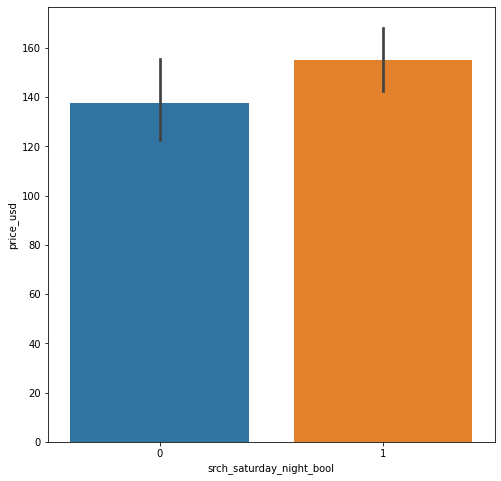

In [0]:
plt.figure(figsize=(8,8))
sns.barplot(y='price_usd',x='srch_saturday_night_bool',data=train[:500])


In [0]:
date_time=train.pop('date_time')

features = StandardScaler().fit_transform(train[:10000][:-2].values)

from sklearn.impute import SimpleImputer

mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
features_mean_imputed = mean_imputer.fit_transform(features)

pca = PCA(n_components=0.90, whiten=True)
features_pca = pca.fit_transform(features_mean_imputed)

print("Original number of features:", features.shape[1])
print("Reduced number of features:", features_pca.shape[1])

Original number of features: 59
Reduced number of features: 31


In [0]:
temp=pd.DataFrame(features_pca)
temp

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,-0.583966,-0.791938,-0.045194,0.376597,0.984004,0.618807,0.517882,0.042189,0.089822,1.344104,1.318140,-0.903511,0.730139,0.647812,0.012418,-0.438710,-0.721193,1.262990,2.067122,-0.553867,0.105608,-0.796376,-1.888986,0.094554,-0.782733,0.997298,1.372108,0.489398,-1.991575,0.517748,-0.583583
1,-0.409646,-0.714947,0.333737,0.826617,0.903787,0.328753,0.536837,-0.392352,0.162673,1.277500,1.486275,-0.861603,0.516263,0.454252,0.160069,-0.318184,-0.801710,1.091969,2.744349,0.037041,0.028243,-0.522577,-1.131077,-0.584225,-2.793934,-2.012453,0.976357,0.551611,-2.313257,4.064119,-0.527514
2,-0.559089,-0.724849,0.333113,0.662572,0.984074,0.437087,0.338652,-0.259489,0.099646,1.231262,1.266286,-0.689083,0.088973,0.729073,-0.239540,-0.502377,-0.563623,1.072887,2.245812,-0.366345,-0.031768,-0.542634,-1.481533,-0.438709,-1.018620,1.428779,1.726186,0.660996,-1.500714,0.495129,-0.331887
3,-0.272595,-0.804509,0.211371,1.398469,1.180901,0.486369,0.033074,-0.575813,-0.325559,1.748683,2.592831,-0.183643,1.181048,-0.908890,0.467384,-0.440103,0.556150,1.314162,2.215799,0.361956,-2.320495,1.848574,-1.459022,0.503623,-4.534547,-1.422823,2.610332,2.640258,-0.106132,3.786732,2.973101
4,-0.266856,-0.599267,0.554223,0.420720,1.090979,0.389642,0.381924,-0.133804,0.368162,1.531334,0.868582,-0.684423,-0.576397,1.120857,-0.870014,-0.067231,0.571246,0.705833,2.176697,-0.209204,0.103022,-0.735143,-1.891702,0.230888,-0.375285,0.765763,1.073713,0.127060,-2.406598,0.686844,-0.646195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,-1.745580,-0.534403,-0.715751,-0.939217,-0.415745,-0.479981,-0.291200,0.623860,1.109329,-1.311041,0.254719,0.223683,0.686454,-0.480633,-1.357370,0.164477,0.631112,1.125683,-0.458831,-0.285623,-0.118055,0.560607,1.180221,1.025498,0.026701,-0.505826,0.106664,-0.110476,-0.451700,-0.250741,0.815156
9994,-1.640972,-0.622565,-1.248357,-1.435940,-0.240078,-0.219161,-0.202993,0.962622,1.155040,-0.836577,0.130220,1.050411,1.200602,-0.752960,-0.746509,0.958352,0.697086,1.093297,-0.758088,-0.137614,0.053927,0.846980,1.956380,-0.523766,-0.646884,0.729734,0.758639,0.266570,0.964190,-0.074672,1.068437
9995,-1.273237,-0.170620,0.066350,-0.160286,-0.540570,-1.086138,-0.669562,0.539130,1.366564,-1.173887,0.340876,0.194248,0.022385,-0.340171,-1.479630,-0.272905,0.606159,1.464832,-0.615407,-0.255182,-0.081776,0.812093,1.535471,-0.099200,0.055563,-0.148710,0.058354,0.150768,-0.326239,-0.023002,0.339984
9996,-1.403959,-0.287773,-0.197776,-0.496220,-0.499498,-0.893329,-0.472541,0.483751,1.365002,-1.383509,0.191349,0.279548,0.073716,-0.287156,-1.535993,-0.013508,0.742066,1.281320,-0.457580,-0.105873,-0.167543,0.682620,1.255010,0.361798,0.318605,-0.494409,-0.108003,0.159920,-0.751578,0.075527,-0.140295


In [0]:
train.loc[train['prop_id'] == 104517]

,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,comp1_rate,comp1_inv,comp1_rate_percent_diff,comp2_rate,comp2_inv,comp2_rate_percent_diff,comp3_rate,comp3_inv,comp3_rate_percent_diff,comp4_rate,comp4_inv,comp4_rate_percent_diff,comp5_rate,comp5_inv,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool,month,day,hour,minute,dayofweek,quarter
746,63,14,100,NaN,NaN,219,104517,4,4.0,1,4.16,0.2534,5.30,15,69.87,1,8192,4,25,3,0,1,0,NaN,1937.85,1,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0,5,23,11,56,3,2
1255,90,14,100,NaN,NaN,219,104517,4,4.0,1,4.16,0.2534,5.29,6,97.49,1,8192,2,44,1,0,1,1,NaN,1208.63,1,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0,4,23,11,12,1,2
2041,133,5,219,NaN,NaN,219,104517,4,4.0,1,4.16,0.2534,5.29,29,206.00,1,8192,3,99,1,0,1,1,NaN,397.74,1,NaN,NaN,NaN,-1.0,0.0,2.0,-1.0,0.0,2.0,NaN,NaN,NaN,-1.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0,3,14,11,27,3,1
2309,148,10,4,NaN,NaN,219,104517,4,4.0,1,4.16,0.2534,5.29,33,127.71,1,8192,4,227,1,0,1,0,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,3,21,2,24,3,1
3152,203,5,219,NaN,NaN,219,104517,4,4.0,1,4.16,0.2534,5.29,6,186.00,1,8192,3,6,2,0,1,0,NaN,222.13,0,NaN,NaN,NaN,1.0,0.0,14.0,0.0,0.0,20.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,14.0,0,NaN,0,1,3,20,48,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9908584,664974,5,219,NaN,NaN,219,104517,4,4.0,1,4.16,0.2534,5.29,8,107.00,1,8192,3,30,2,0,1,1,NaN,876.42,1,NaN,NaN,NaN,1.0,0.0,7.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1,NaN,0,1,2,19,36,2,1
9911528,665178,5,219,NaN,NaN,219,104517,4,4.0,1,4.16,0.2534,5.29,8,81.00,1,8192,1,73,2,1,1,0,NaN,1324.62,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,2,23,12,27,5,1
9915868,665454,5,219,NaN,NaN,219,104517,4,4.0,1,4.16,0.2534,5.31,14,59.00,1,8192,6,33,2,0,1,0,NaN,382.59,1,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0,11,17,17,53,5,4
9916580,665512,5,219,NaN,NaN,219,104517,4,4.0,1,4.16,0.2534,5.29,16,71.00,1,8192,2,59,2,0,1,0,NaN,257.65,0,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0,4,26,18,52,4,2


In [0]:
train['date_time']=pd.Series(date_time)

df = train.loc[train['prop_id'] == 104517]

df = df.loc[df['visitor_location_country_id'] == 219]

df = df.loc[df['srch_room_count'] == 1]

df = df[['date_time', 'price_usd', 'srch_booking_window', 'srch_saturday_night_bool']]

df.describe()

,price_usd,srch_booking_window,srch_saturday_night_bool
count,3049.000000,3049.000000,3049.000000
mean,112.939023,37.082650,0.524434
std,113.374049,46.160272,0.499485
min,0.120000,0.000000,0.000000
25%,67.000000,6.000000,0.000000
50%,100.000000,20.000000,1.000000
75%,141.000000,48.000000,1.000000
max,5584.000000,292.000000,1.000000


In [0]:
df = df.loc[df['price_usd'] < 5584]
df['price_usd'].describe()


count    3048.000000
mean      111.144055
std        55.055161
min         0.120000
25%        67.000000
50%       100.000000
75%       141.000000
max       536.000000
Name: price_usd, dtype: float64

In [0]:
df['date_time'].describe()

df['date_time'] = pd.to_datetime(df['date_time'])

df.head()

,date_time,price_usd,srch_booking_window,srch_saturday_night_bool
2041,2013-03-14 11:27:28,206.0,99,1
3152,2013-01-03 20:48:24,186.0,6,0
5166,2013-01-19 16:51:27,61.0,1,0
10135,2013-01-26 11:34:23,72.0,116,0
10560,2013-04-29 09:39:50,246.0,245,0


Text(0.5, 1.0, 'Time series of room price by date of search')

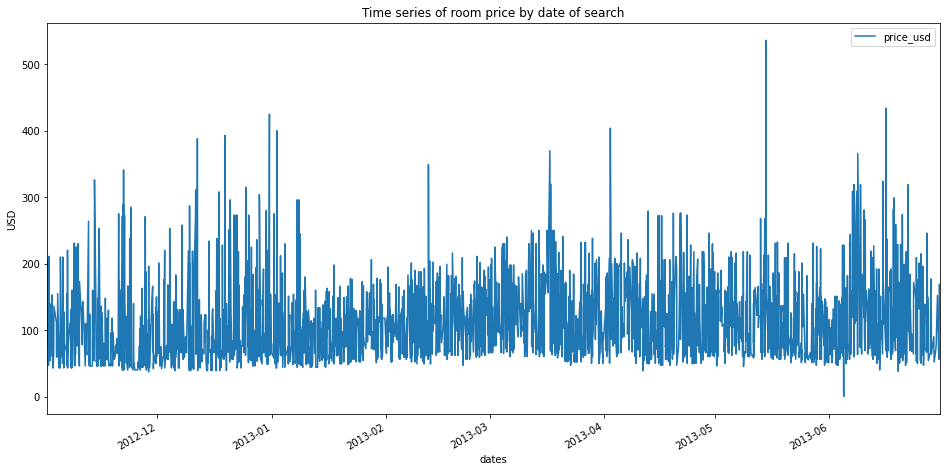

In [0]:
df.plot(x = 'date_time', 
        y = 'price_usd', 
        figsize = (16, 8))

plt.xlabel('dates')
plt.ylabel('USD')
plt.title('Time series of room price by date of search')

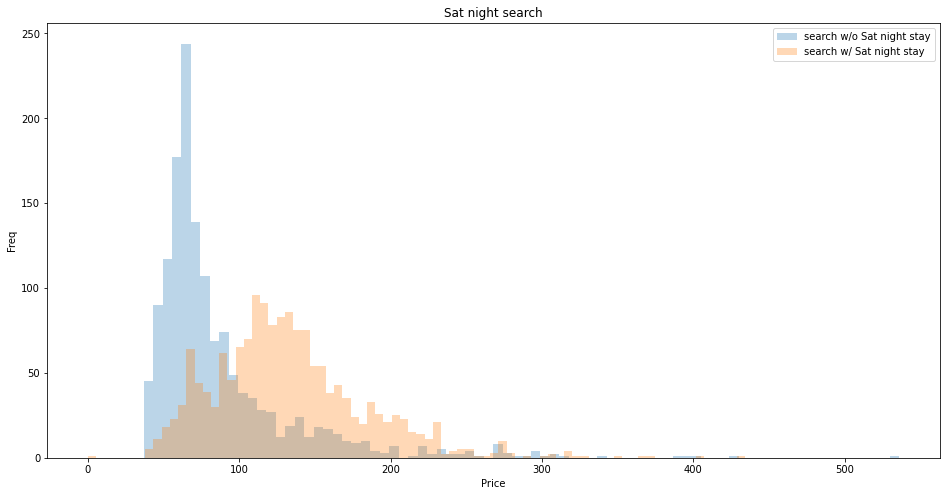

In [0]:
a = df.loc[df['srch_saturday_night_bool'] == 0, 'price_usd']
b = df.loc[df['srch_saturday_night_bool'] == 1, 'price_usd']

plt.figure(figsize = (16, 8))

plt.hist(a, bins = 80, 
         alpha = 0.3, 
         label = 'search w/o Sat night stay')

plt.hist(b, bins = 80, 
         alpha = 0.3, 
         label = 'search w/ Sat night stay')

plt.xlabel('Price')
plt.ylabel('Freq')
plt.legend()
plt.title('Sat night search')
plt.plot();

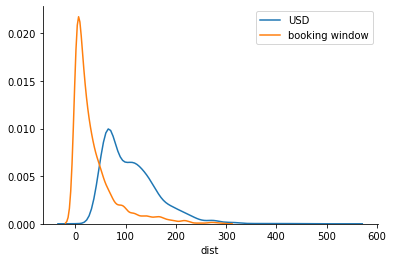

In [0]:
sns.distplot(df['price_usd'], 
                 hist = False, label = 'USD')

sns.distplot(df['srch_booking_window'], 
                  hist = False, label = 'booking window')

plt.xlabel('dist')
sns.despine()

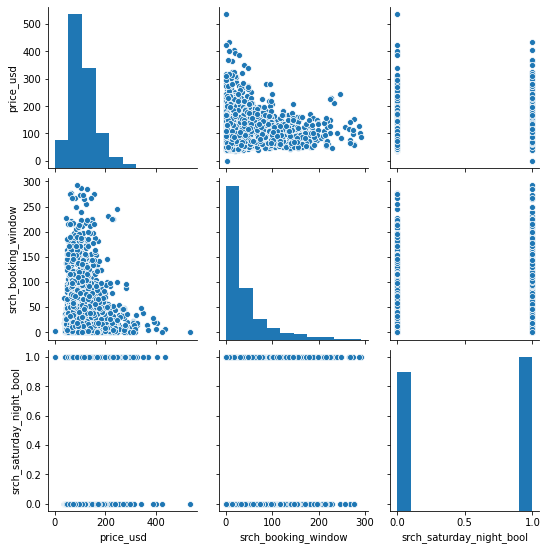

In [0]:
sns.pairplot(df)

In [0]:
df = df.sort_values('date_time')
df['date_time_int'] = df.date_time.astype(np.int64)
df

,date_time,price_usd,srch_booking_window,srch_saturday_night_bool,date_time_int
3945840,2012-11-01 02:48:30,84.0,19,0,1351738110000000000
63387,2012-11-01 03:06:43,78.0,16,1,1351739203000000000
3352426,2012-11-01 09:04:18,114.0,56,1,1351760658000000000
5257418,2012-11-01 09:11:03,76.0,56,1,1351761063000000000
7091061,2012-11-01 10:15:25,128.0,0,1,1351764925000000000
...,...,...,...,...,...
2792991,2013-06-30 07:03:56,152.0,11,1,1372575836000000000
9363497,2013-06-30 15:42:32,56.0,172,1,1372606952000000000
143486,2013-06-30 16:43:40,68.0,8,0,1372610620000000000
2478763,2013-06-30 20:07:12,169.0,27,1,1372622832000000000


In [0]:
from sklearn.cluster import KMeans
data = df[['price_usd', 'srch_booking_window', 'srch_saturday_night_bool']]
n_cluster = range(1, 50)

kmeans = [KMeans(n_clusters = i).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]

kmeans,scores

([KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
         n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
         random_state=None, tol=0.0001, verbose=0),
  KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
         n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
         random_state=None, tol=0.0001, verbose=0),
  KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
         n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
         random_state=None, tol=0.0001, verbose=0),
  KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
         n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
         random_state=None, tol=0.0001, verbose=0),
  KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
         n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
         random_state=None, tol=0.0001, verbose=0),


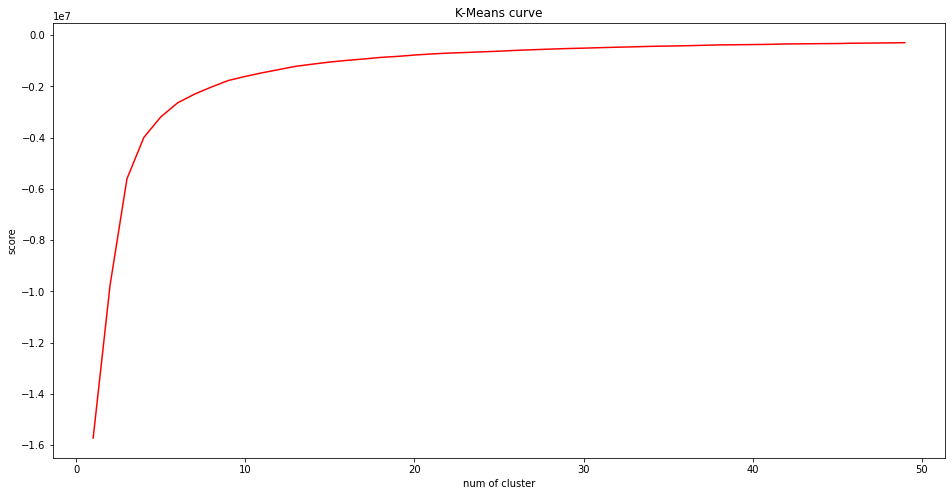

In [0]:
fig, ax = plt.subplots(figsize = (16, 8))
ax.plot(n_cluster, scores, color = 'red')

plt.xlabel('num of cluster')
plt.ylabel('score')
plt.title('K-Means curve')
plt.show();

In [0]:
km = KMeans(n_clusters = 20).fit(data)

X = df[['price_usd', 'srch_booking_window', 'srch_saturday_night_bool']]
X = X.reset_index(drop = True)
s=km.predict(X)
s

array([18, 18,  5, ..., 18,  2, 10], dtype=int32)

In [0]:
df['date_time'].values.shape

(3048,)

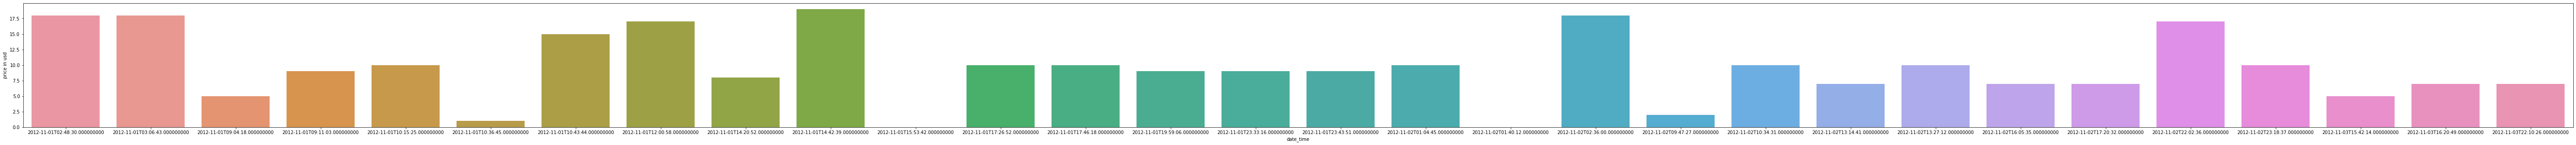

In [0]:
new_df=pd.DataFrame()
new_df['date_time']=pd.Series(df['date_time'].values)
new_df['price in usd']=pd.Series(s)

plt.figure(figsize=(100,5))
sns.barplot(x='date_time',y='price in usd',data=new_df[:30])